In [1]:
####importing packages
import sys
sys.path.append('/work/mh0731/m300876/package/')
import icons
from pathlib import Path
import importlib
import numpy as np


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [2]:
icons.prepare_cpu(memory='64GB')

Number of CPUs: 256, number of threads: 256, number of workers: 1, processes: False


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/m300876/levante-spawner-advanced//proxy/8787/status,
Dashboard: /user/m300876/levante-spawner-advanced//proxy/8787/status,Workers: 1
Total threads: 256,Total memory: 59.60 GiB
Status: running,Using processes: False
Comm: inproc://136.172.121.117/434020/1,Workers: 1
Dashboard: /user/m300876/levante-spawner-advanced//proxy/8787/status,Total threads: 256
Started: Just now,Total memory: 59.60 GiB
Comm: inproc://136.172.121.117/434020/4,Total threads: 256
Dashboard: /user/m300876/levante-spawner-advanced//proxy/44645/status,Memory: 59.60 GiB
Nanny: None,


In [3]:
#Define a global pattern to find the files
###cloud liquid water 
glob_pattern_3d1 = 'atm_2d_30min_mean'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/work/bm1235/k203123/experiments/ngc2009')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
files01 = sorted([str(f) for f in data_path1.glob(f'run*/*{glob_pattern_3d1}*')])[:]

**Meridional mean**

In [13]:
var='pr';
lat=[-10,10]
lon=[90,150]
time = ['2020-01-21','2020-03-31']

In [14]:
#icons.meridional_mean(files,variable,time_range,latitude_range,longitude_range,interval_bins,t_step,mask,better_times)
#interval_bins = size in degrees for grouping longitudes 
#t_step = time resample. By default is one day (1D)
#mask = land-sea mask. By default is None. 0 to mask land and 1 to mask ocean.
#better_times = False for simulation in the Cycle2. True for simulation of Cycle 1.
%time pr_mean01 = icons.meridional_mean(files01,var,time,lat,lon,0.5,mask=None,better_time=False)

CPU times: user 6min 57s, sys: 4min 5s, total: 11min 3seted |  5min 19.9s
Wall time: 7min 34s


In [15]:
from matplotlib import pyplot as plt # Standard Plotting library
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

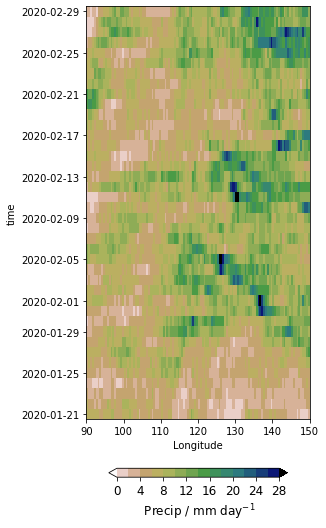

In [16]:
fig = plt.figure(figsize=(4, 10))
ax = fig.add_subplot(111)
plot= (pr_mean01*24*3600).sel(time=slice('2020-01-20','2020-02-29')).plot(cmap='gist_earth_r',levels = np.linspace(0,28,15),extend='both',add_colorbar=False)
ax.set_xlim([90,150])
ax.set_xlabel('Longitude')
cb1 = plt.colorbar(plot,extend='both',orientation='horizontal',shrink=0.8,pad=0.09)
cb1.ax.set_xlabel(' Precip / mm day$^{-1}$',fontsize=12)
cb1.ax.tick_params(labelsize=12)
plt.subplots_adjust(wspace=0.6)

**Zonal mean**

In [18]:
var='pr';
lat=[-10,10]
lon=[90,150]
time = ['2020-01-21','2020-03-31']

In [17]:
#icons.zonal_mean(files,variable,time_range,latitude_range,longitude_range,interval_bins,t_step,mask,better_times)
#interval_bins = size in degrees for grouping latitudes
#t_step = time resample. By default is one day (1D)
#mask = land-sea mask. By default is None. 0 to mask land and 1 to mask ocean.
#better_times = False for simulation in the Cycle2. True for simulation of Cycle 1.
%time pr_mean_zonal = icons.zonal_mean(files01,var,time,lat,lon,0.5,mask=None,better_time=False)

CPU times: user 5min 38s, sys: 4min 8s, total: 9min 46seted |  4min 47.4s
Wall time: 6min 58s


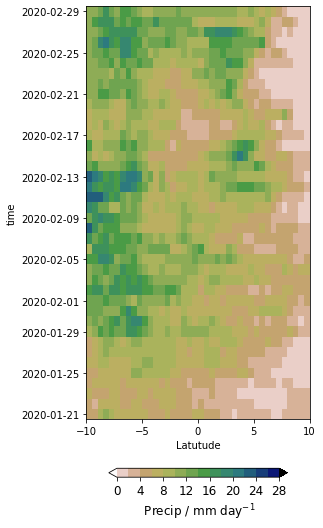

In [20]:
fig = plt.figure(figsize=(4, 10))
ax = fig.add_subplot(111)
plot= (pr_mean_zonal*24*3600).sel(time=slice('2020-01-20','2020-02-29')).plot(cmap='gist_earth_r',levels = np.linspace(0,28,15),extend='both',add_colorbar=False)
ax.set_xlim([-10,10])
ax.set_xlabel('Latutude')
cb1 = plt.colorbar(plot,extend='both',orientation='horizontal',shrink=0.8,pad=0.09)
cb1.ax.set_xlabel(' Precip / mm day$^{-1}$',fontsize=12)
cb1.ax.tick_params(labelsize=12)
plt.subplots_adjust(wspace=0.6)

Text(0, 0.5, 'Precipitation / mm day$^{-1}$')

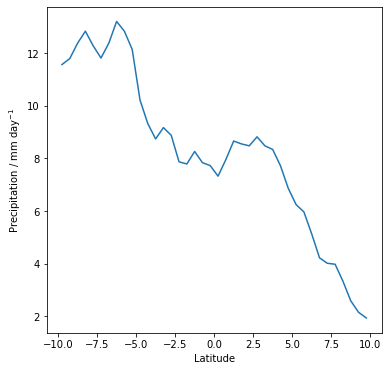

In [23]:
###cmputing zonal mean
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
plot= (pr_mean_zonal*24*3600).sel(time=slice('2020-01-20','2020-02-29')).mean(dim='time').plot()
ax.set_xlabel('Latitude')
ax.set_ylabel('Precipitation / mm day$^{-1}$')